In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('college-data.csv')
df['founded_in'] = df['founded_in'].astype(int, errors='ignore')
df['founded_in'] = pd.to_datetime(df['founded_in'], format='%Y')
df['for_profit'] = df['for_profit'].astype(int)
# df['closed_merged_in'] = df['closed_merged_in'].astype(int, errors='ignore')
# df['closed_merged_in'] = pd.to_datetime(df['closed_merged_in'], format='%Y')

df.dtypes
# df['for_profit'] = df['for_profit'].astype(bool)
# df['religious_controlled'] = df['religious_controlled'].astype(bool)
# df.head(25)

name                            object
state                           object
location                        object
control                         object
for_profit                       int32
religious_controlled             int64
religious_orentation            object
degree_type                     object
focus                           object
founded_in              datetime64[ns]
closed_merged_in                object
done                            object
closed_reason                   object
enrollment                      object
historically_black              object
accreditation                   object
dtype: object

In [3]:
degree_types = ["Doctoral University", "Baccalaureate College", "Liberal Arts", "Masters University"]
degree_filter = df['degree_type'].isin(degree_types)

colleges = df[degree_filter]
# colleges.head(50)

In [17]:
# private_colleges = colleges[colleges['control'] == "Private"]
# private_colleges.head(25)
# non_profit_colleges = private_colleges[private_colleges['for_profit'] == 0]
# non_profit_colleges.head(25)
# secular_non_profit_colleges = non_profit_colleges[non_profit_colleges['religious_controlled'] == 0] 

secular_non_profit_colleges = colleges[
    (colleges['control'] == "Private") &
    (colleges['for_profit'] == 0) &
    (colleges['religious_controlled'] == 0) 
]

secular_non_profit_colleges.head(5)
# secular_non_profit_colleges.dtypes

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS


In [64]:
# Cast new dataframe with null values expunged for `founded_in` feature
try:
	snp_colleges_non_null = secular_non_profit_colleges.copy()
	snp_colleges_non_null["founded_in"].dropna(inplace=True)
	ARG_NON_NULL_FOUNDRY = snp_colleges_non_null["founded_in"].notnull()
	snp_colleges_non_null = snp_colleges_non_null[ARG_NON_NULL_FOUNDRY]
except:
    print("`Founded_In` null values are already dropped.")
    
snp_colleges_non_null.head()

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS


In [65]:
snp_colleges_nn_time_series = (
	snp_colleges_non_null["founded_in"].value_counts()
    								   .rename_axis("Year")
    								   .reset_index(name="Count")
)

# Get Count Sums Per Decade
snp_colleges_nn_time_series = (
	snp_colleges_nn_time_series.groupby((snp_colleges_nn_time_series["Year"].dt.year // 10) * 10)
							   .sum()
							   .reset_index()
)

snp_colleges_nn_time_series

,Year,Count
0,1700,1
1,1740,4
2,1750,1
3,1760,2
4,1770,3
5,1780,7
6,1790,4
7,1800,2
8,1810,2
9,1820,9


In [79]:
MIN_YEAR, MAX_YEAR = 1690, 2030

[]

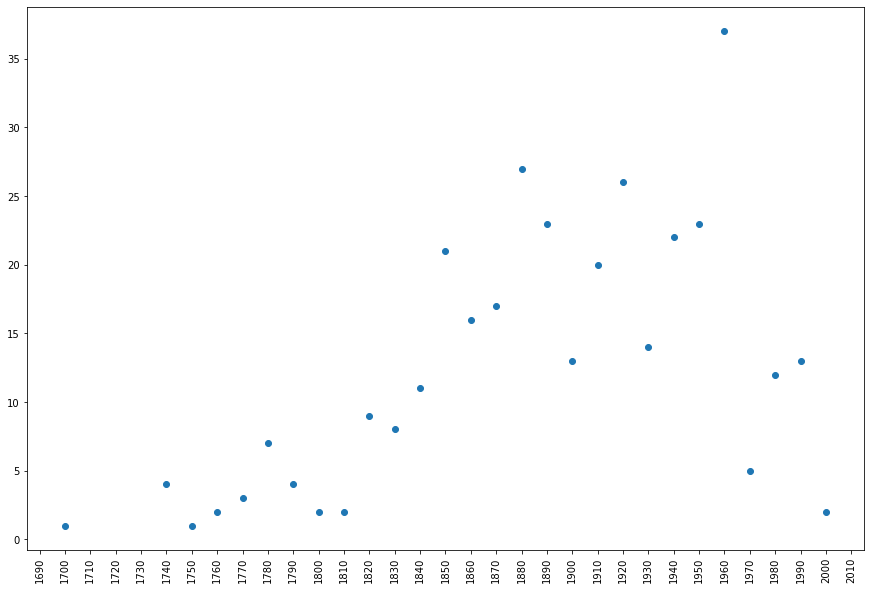

In [80]:
# Scatterplot
plt.figure(figsize=(15, 10))
plt.scatter(x=snp_colleges_nn_time_series["Year"],
            y=snp_colleges_nn_time_series["Count"])

plt.xticks(np.arange(MIN_YEAR, MAX_YEAR, step=10), rotation=90)
plt.plot()

[]

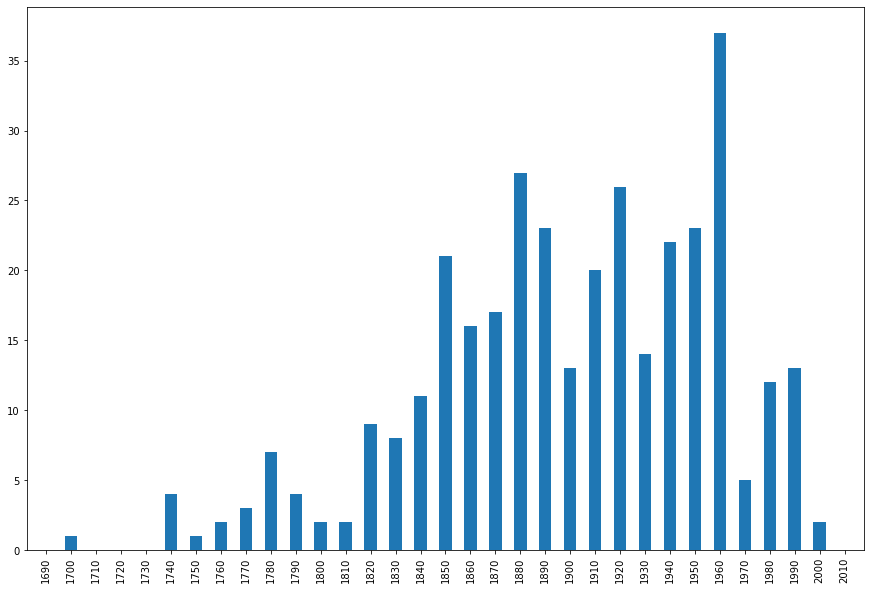

In [82]:
# Barplot
plt.figure(figsize=(15, 10))
plt.xticks(np.arange(MIN_YEAR, MAX_YEAR, step=10), rotation=90)
plt.bar(x=snp_colleges_nn_time_series["Year"],
        height=snp_colleges_nn_time_series["Count"],
        width=5.)
plt.plot()

In [19]:
secular_non_profit_colleges["founded_in"].dt.year

1       1701.0
2       1740.0
3       1742.0
4       1746.0
5       1749.0
         ...  
2933    2008.0
2942    2009.0
2975       NaN
2976       NaN
2977       NaN
Name: founded_in, Length: 348, dtype: float64

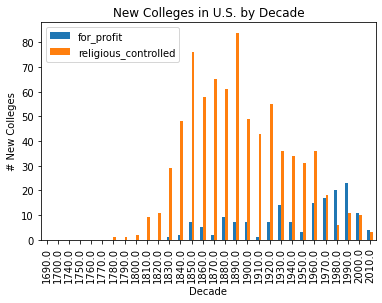

In [6]:
# Line chart of colleges founded by year
colleges_decades = colleges.groupby((colleges.founded_in.dt.year//10)*10).sum()
# print(decades)
colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");

            for_profit  religious_controlled
founded_in                                  
1700.0               0                     0
1740.0               0                     0
1750.0               0                     0
1760.0               0                     0
1770.0               0                     0
1780.0               0                     0
1790.0               0                     0
1800.0               0                     0
1810.0               0                     0
1820.0               0                     0
1830.0               0                     0
1840.0               0                     0
1850.0               0                     0
1860.0               0                     0
1870.0               0                     0
1880.0               0                     0
1890.0               0                     0
1900.0               0                     0
1910.0               0                     0
1920.0               0                     0
1930.0    

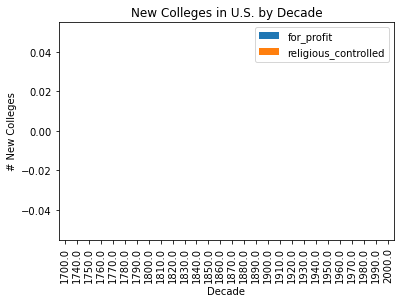

In [8]:
# Line chart of colleges founded by year
secular_non_profit_colleges_decades = secular_non_profit_colleges.groupby((secular_non_profit_colleges.founded_in.dt.year//10)*10).sum()
print(secular_non_profit_colleges_decades)
secular_non_profit_colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");